# 1) Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

warnings.filterwarnings("ignore")

# 2) Coleta dos Dados

In [2]:
df = pd.read_csv(r'../Dados/Tabela_final/tabela_final.csv')
df

,IBGE7,UF,NOME,LATITUDE,LONGITUDE,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,DOCSUP_EF_PUB,...,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,QUAL_MED_AGUA,DIST_CORPO_AGUA,TRANSPORT_COST
0,2700300,AL,ARAPIRACA,-9.75487,-36.6615,28.006125,42.522954,4.658296,3.683754,54.40,...,5.98,4.56,22.45,6.27,24.10,11.76,28.61,62.439167,42.035186,24042.166072
1,2700706,AL,BATALHA,-9.67420,-37.1330,30.831978,36.687844,4.495362,3.590319,12.62,...,6.97,5.33,30.84,8.85,33.44,20.53,40.54,65.300843,24.642419,24257.110578
2,2700904,AL,BELO MONTE,-9.82272,-37.2770,34.847867,52.813493,4.083426,3.171860,27.12,...,9.66,9.26,38.11,12.42,41.81,30.29,49.99,65.300843,3.297594,24226.863743
3,2701209,AL,CACIMBINHAS,-9.40121,-36.9911,38.654232,43.228540,4.104964,3.317861,49.04,...,13.30,9.38,40.61,13.56,43.81,30.14,51.12,65.300843,58.541833,24358.206538
4,2701605,AL,CANAPI,-9.11932,-37.5967,31.898935,36.839351,4.667102,3.633118,20.84,...,11.56,9.10,40.35,15.27,44.16,28.31,51.97,66.893107,68.942666,24734.221802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2806008,SE,RIBEIRÓPOLIS,-10.53570,-37.4380,32.467580,40.276968,4.230984,3.565478,64.68,...,4.75,3.75,28.50,6.08,30.60,11.60,36.26,64.911294,1.388835,23891.778664
1257,2807006,SE,SÃO MIGUEL DO ALEIXO,-10.38470,-37.3836,32.107015,47.482277,3.915938,3.184283,62.08,...,4.04,3.32,33.54,7.79,37.03,18.32,44.72,64.911294,16.508752,23954.902605
1258,2807105,SE,SIMÃO DIAS,-10.73870,-37.8097,35.640213,43.864958,4.286000,3.467918,61.38,...,4.83,3.72,26.78,7.36,28.90,14.39,34.16,65.088090,2.685846,23918.838452
1259,2807303,SE,TELHA,-10.20640,-36.8818,29.921124,45.640696,4.361086,3.524588,45.66,...,4.96,5.45,27.33,5.38,29.62,14.00,35.41,64.553680,4.298665,23869.921712


# 2) Análise Exploratória

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IBGE7                1261 non-null   int64  
 1   UF                   1261 non-null   object 
 2   NOME                 1261 non-null   object 
 3   LATITUDE             1261 non-null   float64
 4   LONGITUDE            1261 non-null   float64
 5   DIST_EF_PUB          1261 non-null   float64
 6   DIST_EM_PUB          1261 non-null   float64
 7   IDEB_AI              1261 non-null   float64
 8   IDEB_AF              1261 non-null   float64
 9   DOCSUP_EF_PUB        1261 non-null   float64
 10  DOCSUP_EM_PUB        1261 non-null   float64
 11  TXNASC7C             1261 non-null   float64
 12  TXNBAIXOP            1261 non-null   float64
 13  PINTERSAP            1261 non-null   float64
 14  PINTERDRSAI          1261 non-null   float64
 15  REN_PIBPC_D          1261 non-null   f

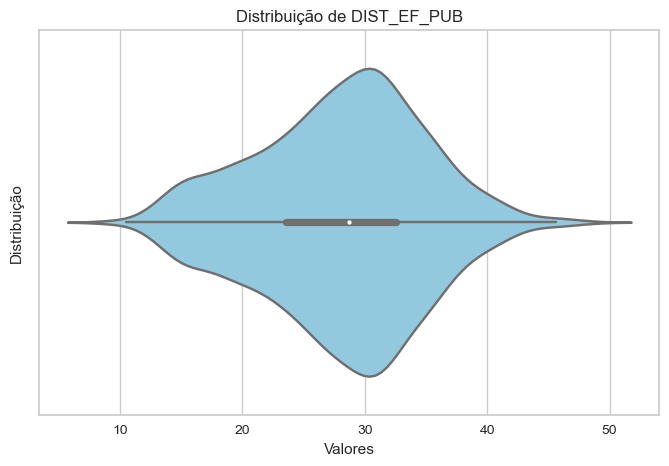

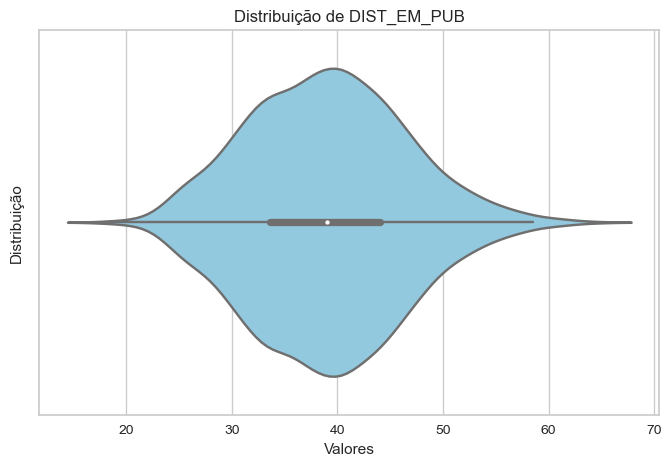

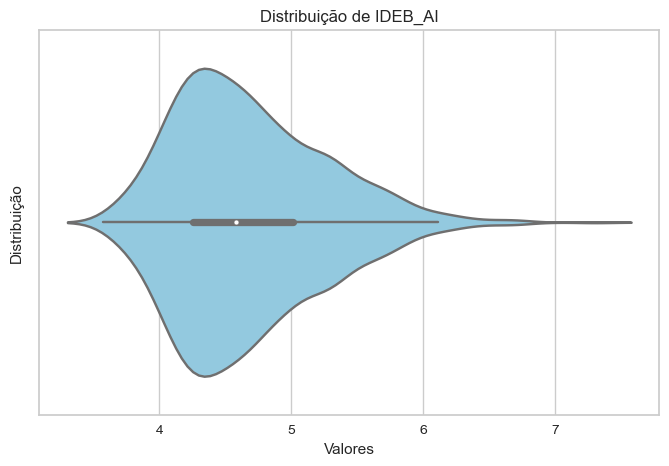

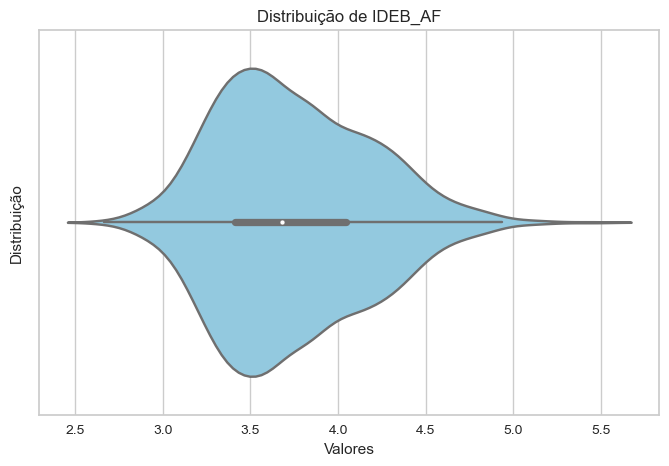

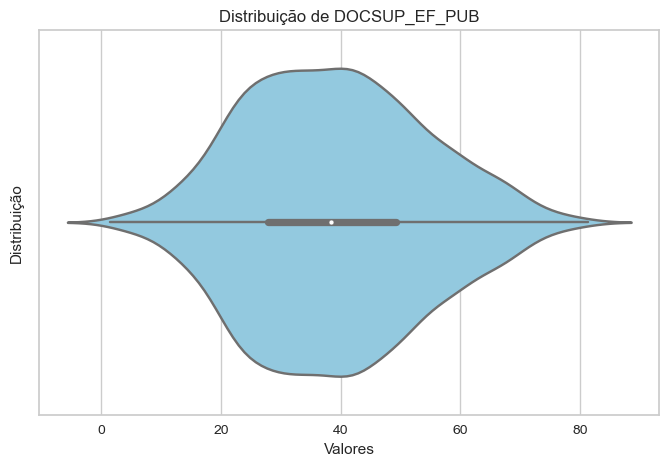

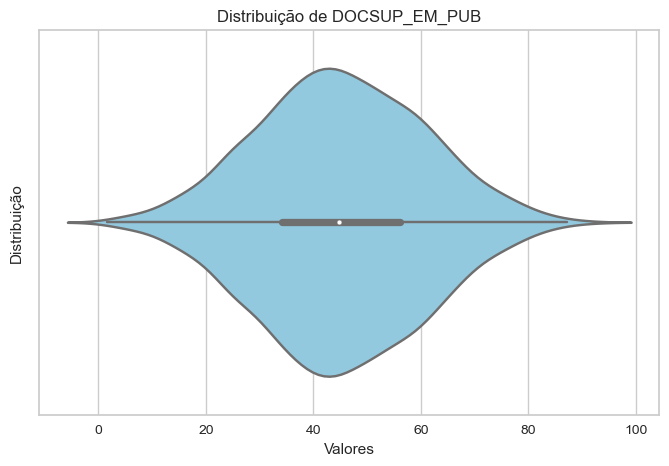

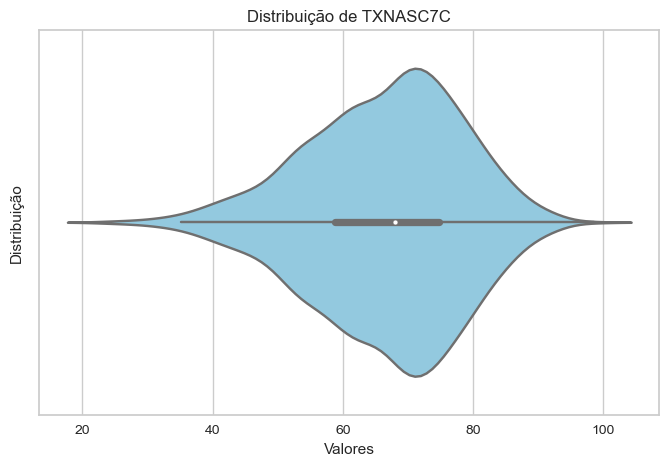

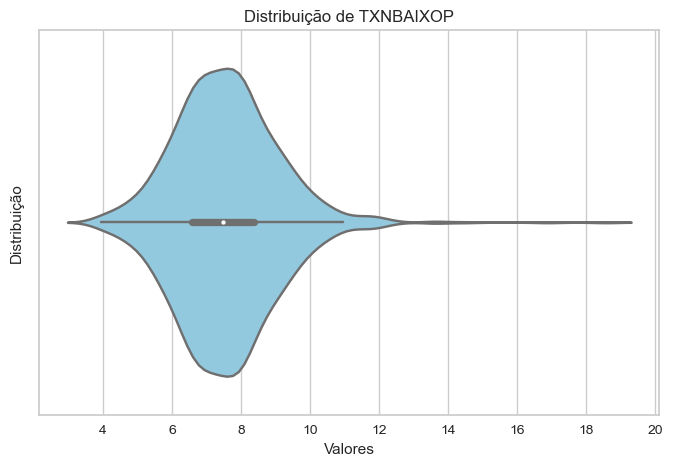

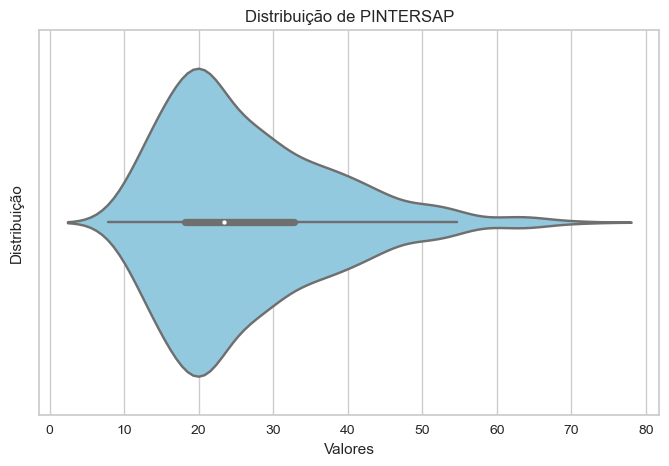

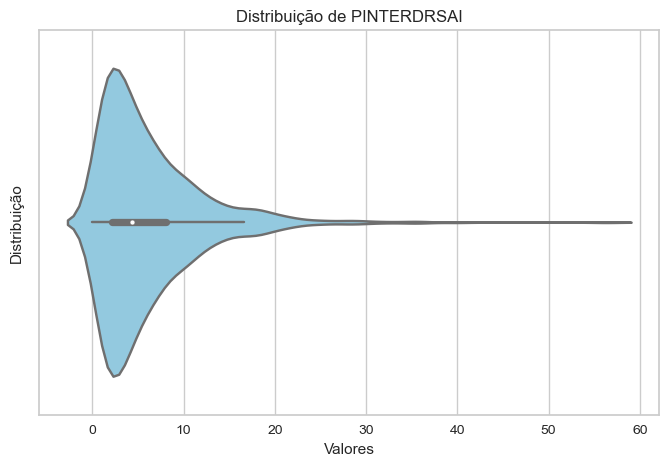

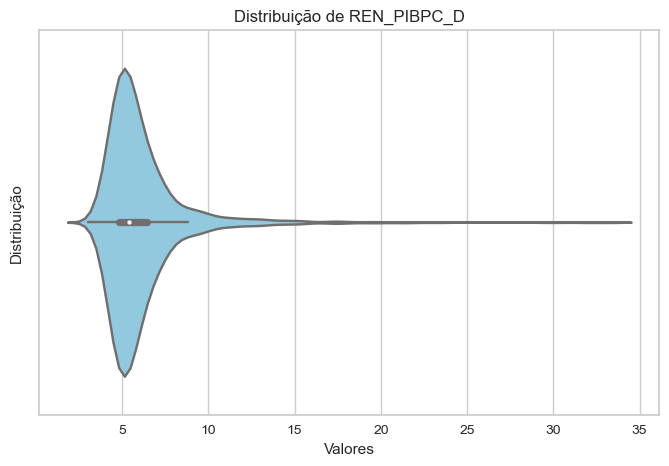

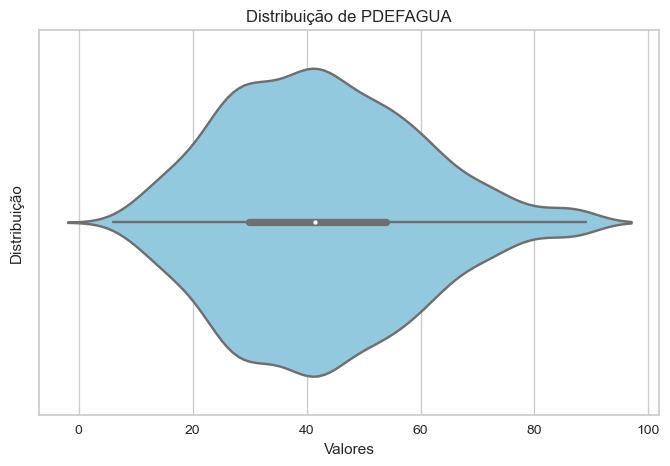

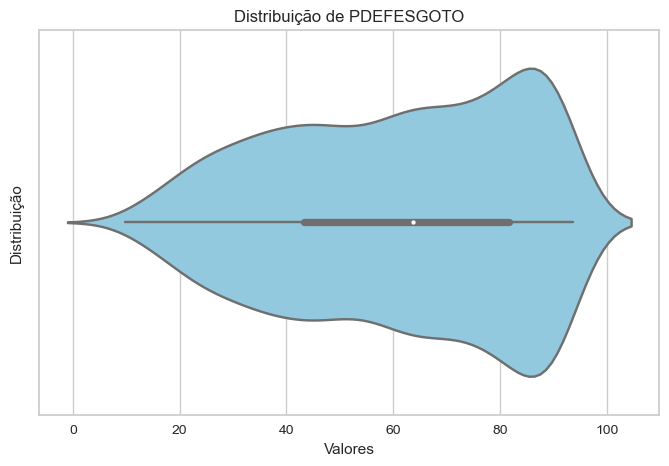

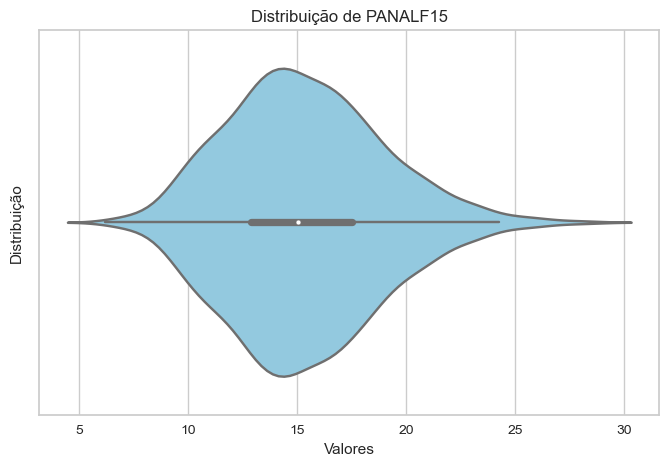

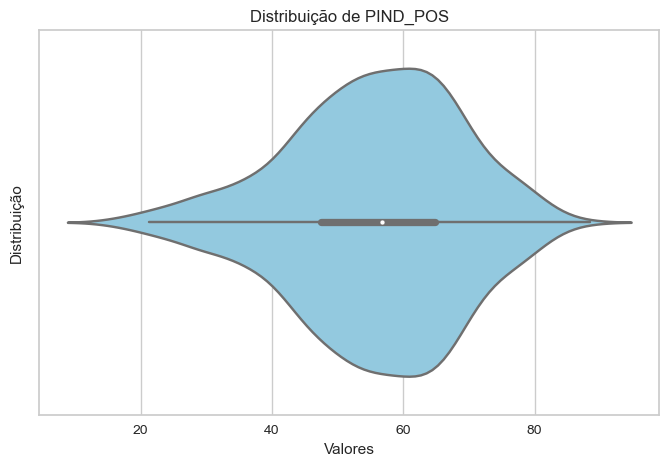

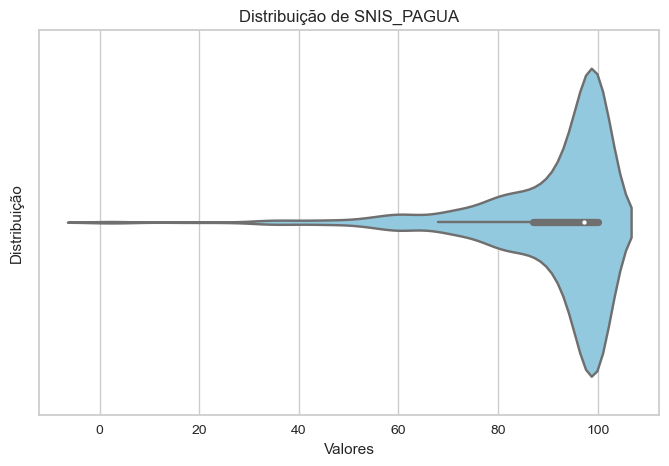

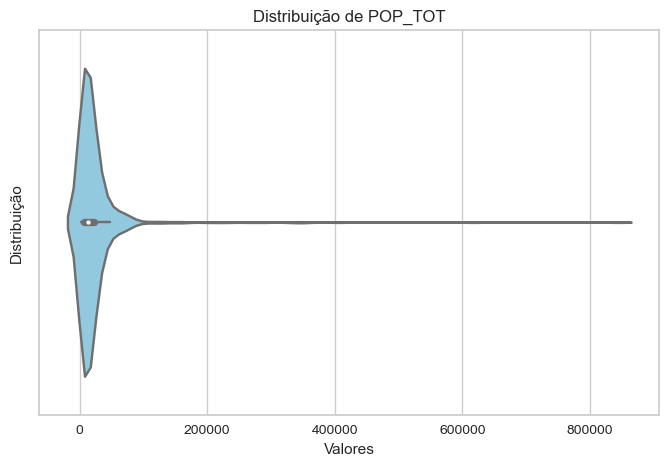

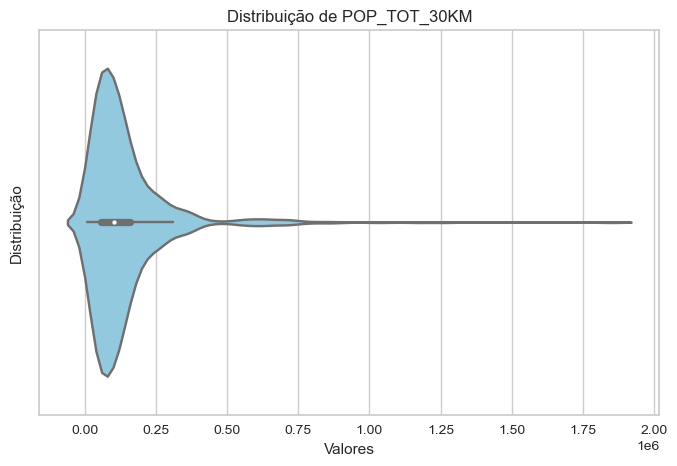

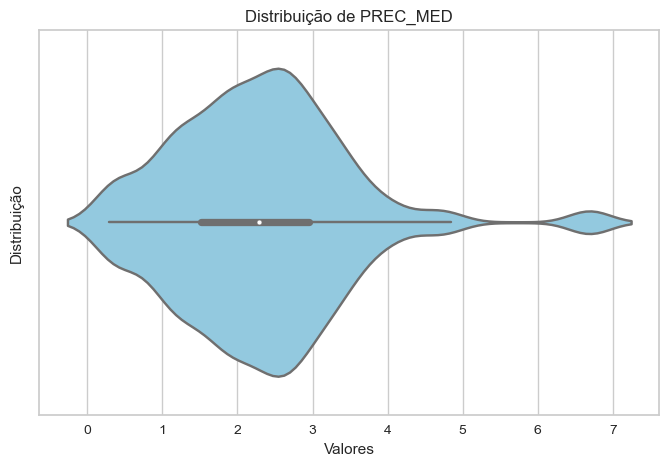

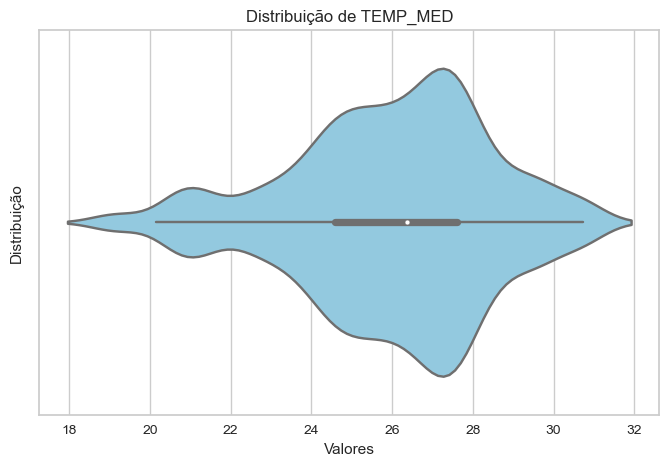

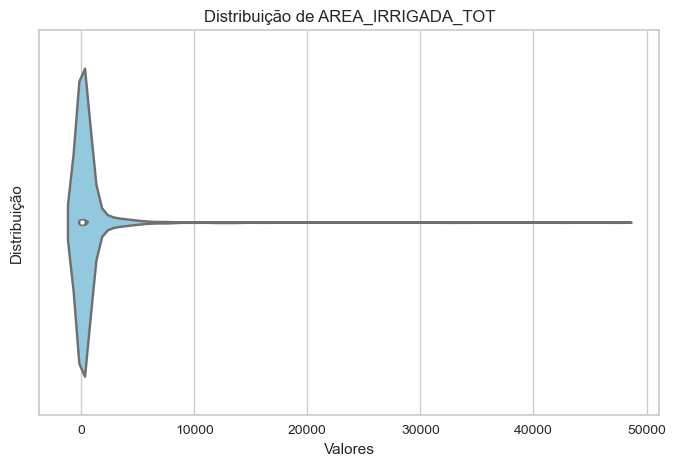

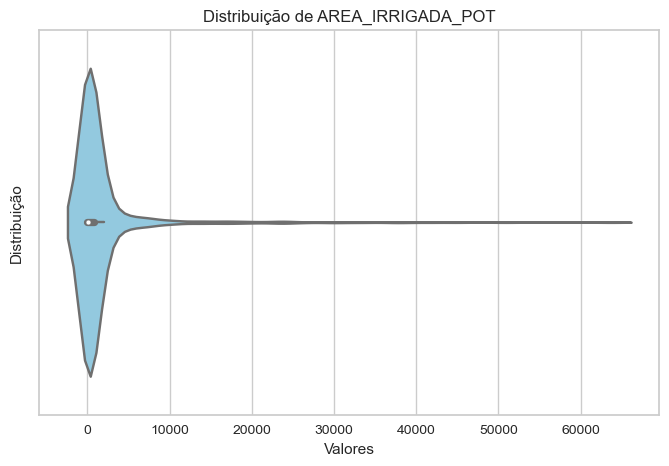

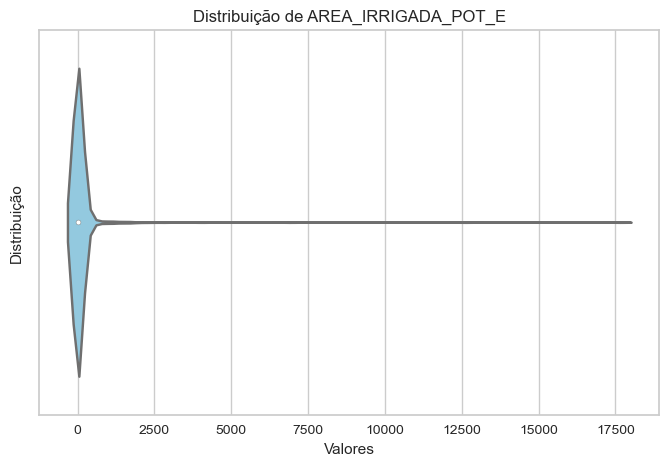

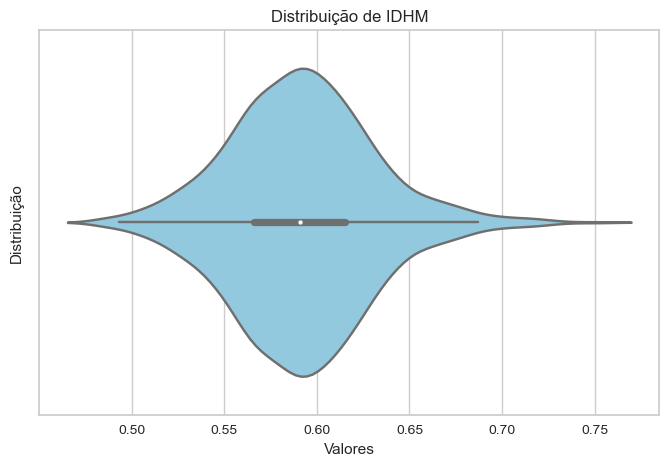

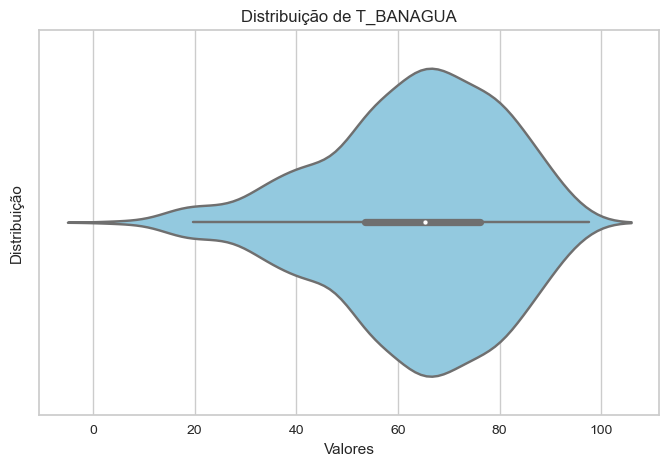

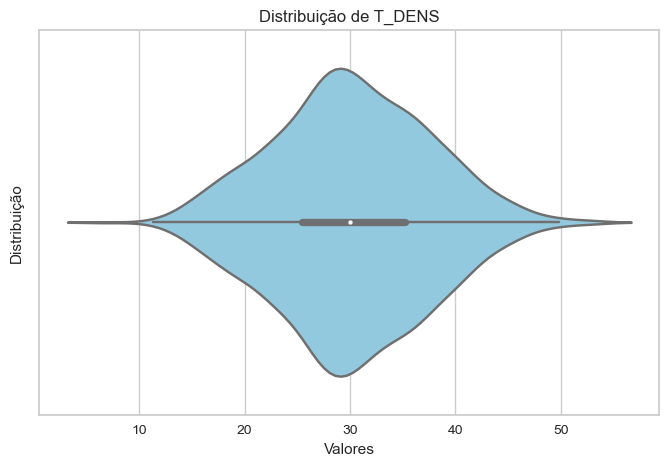

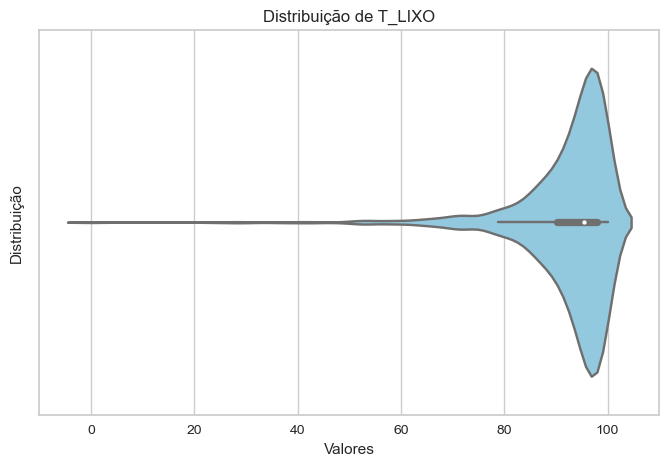

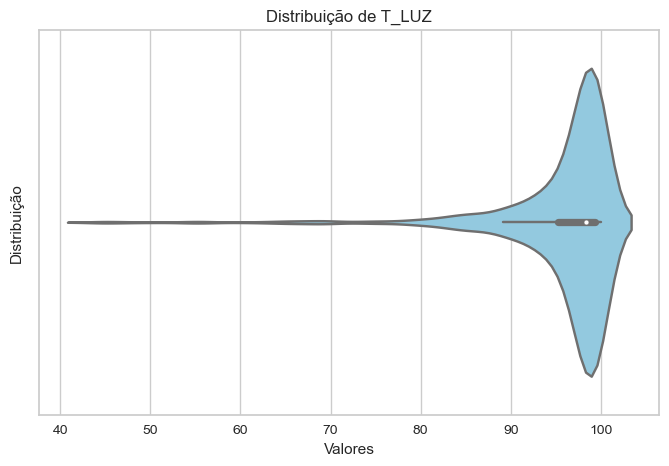

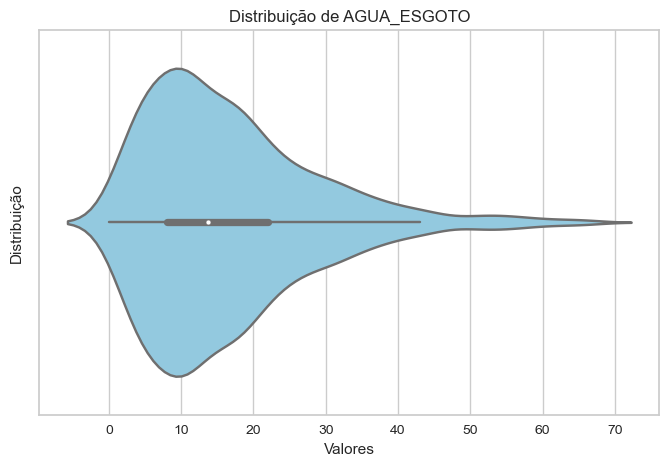

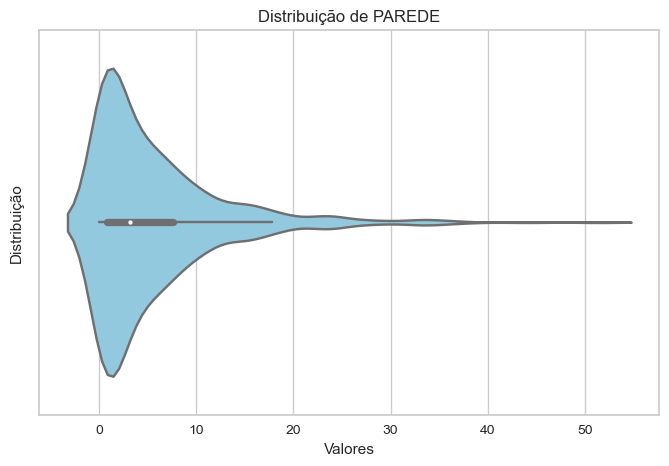

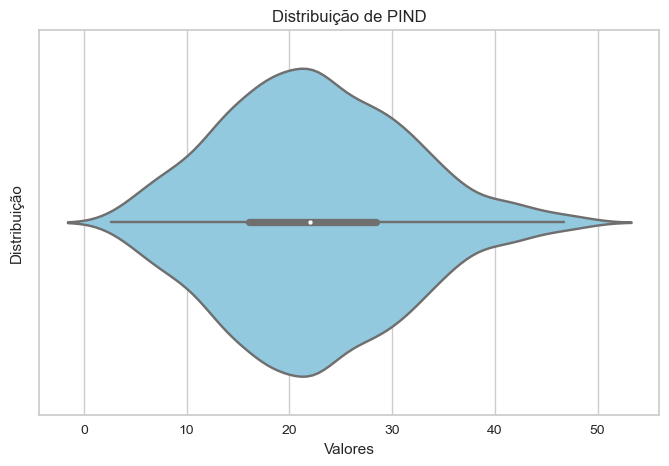

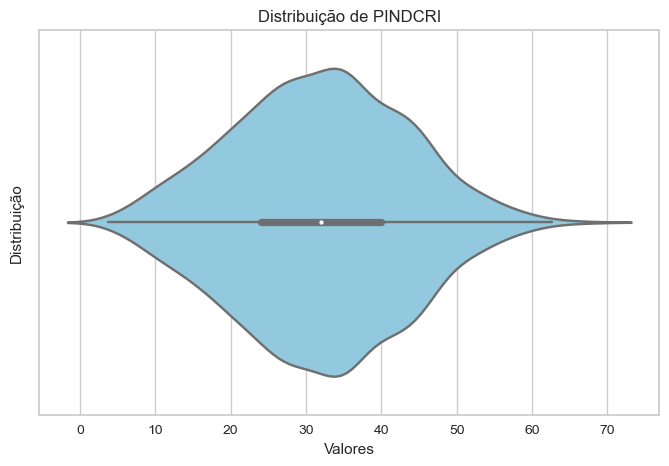

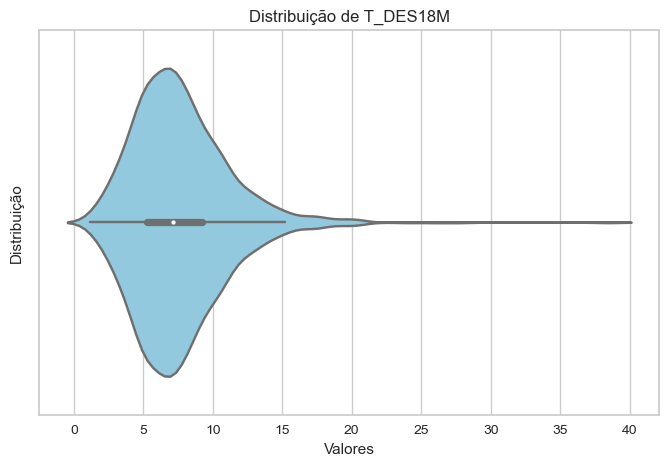

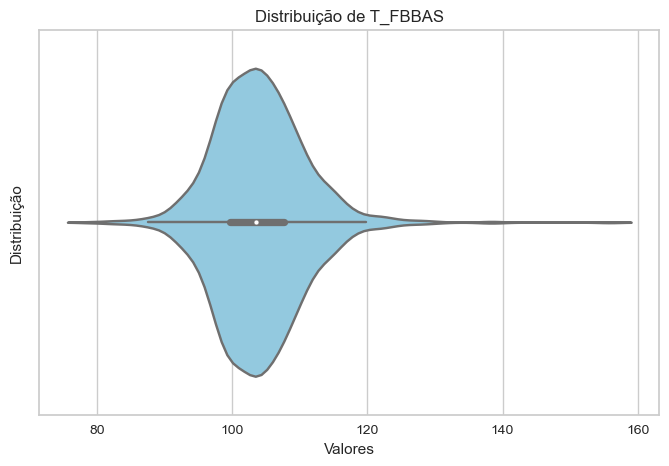

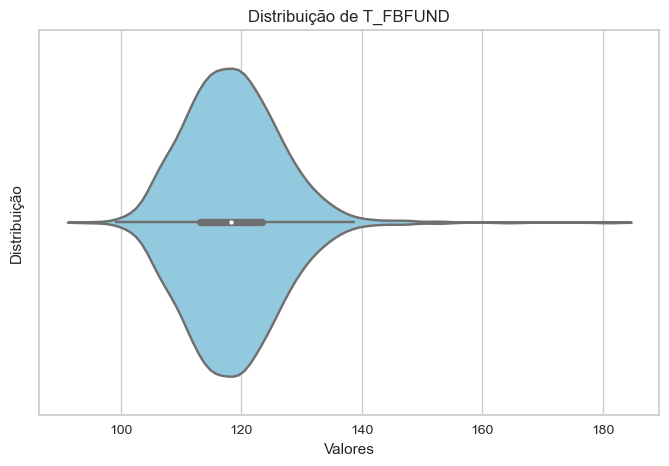

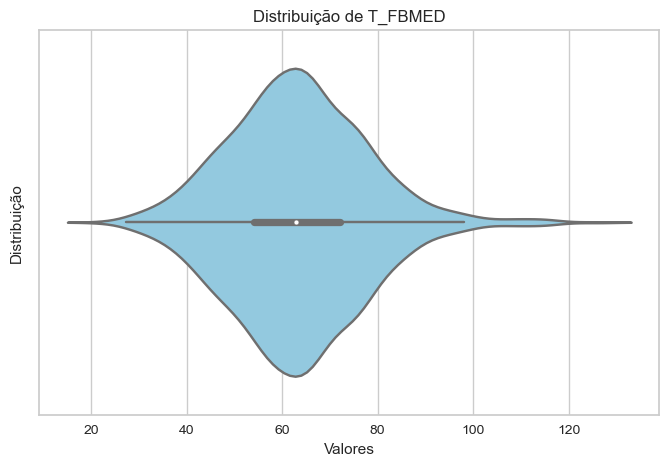

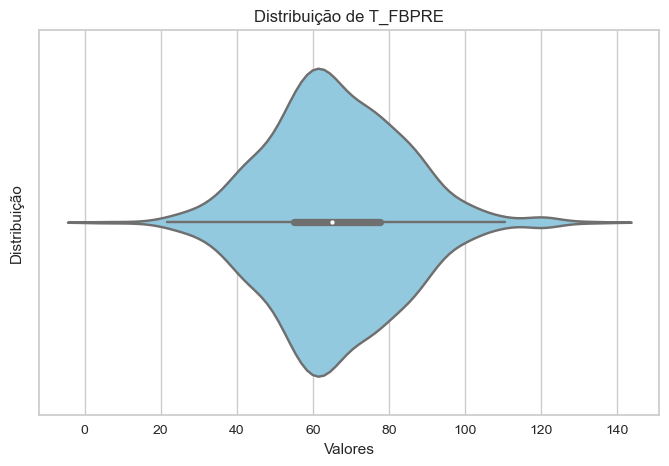

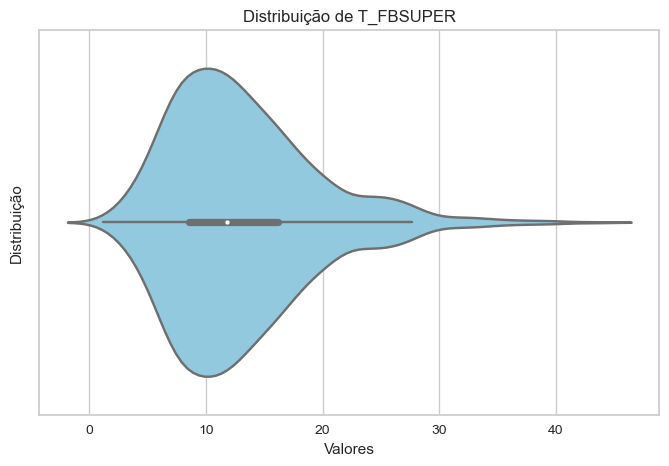

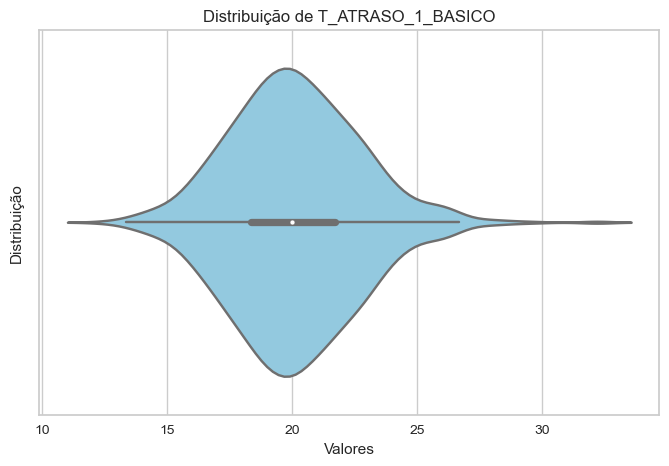

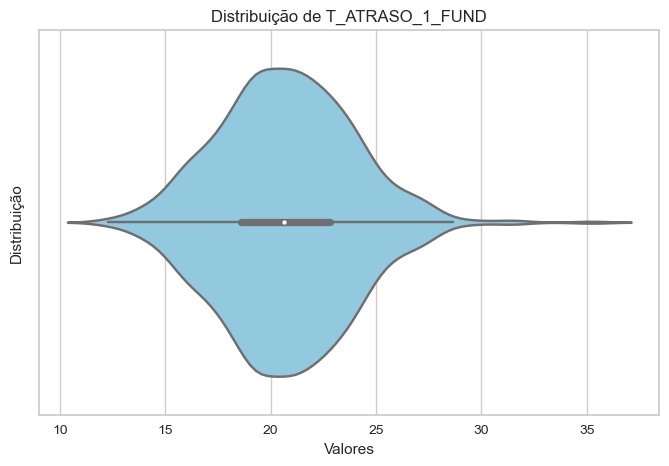

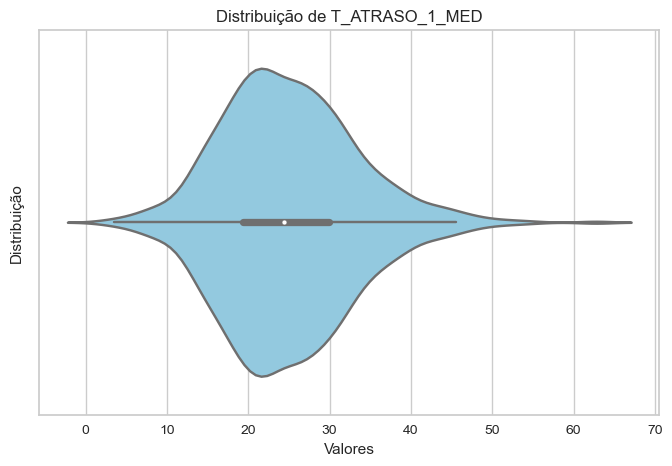

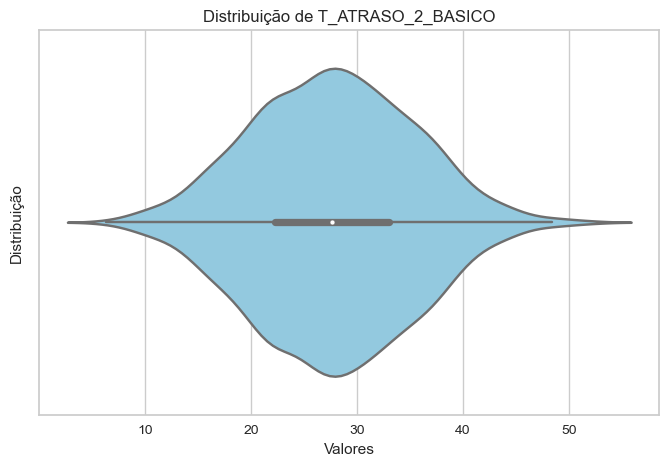

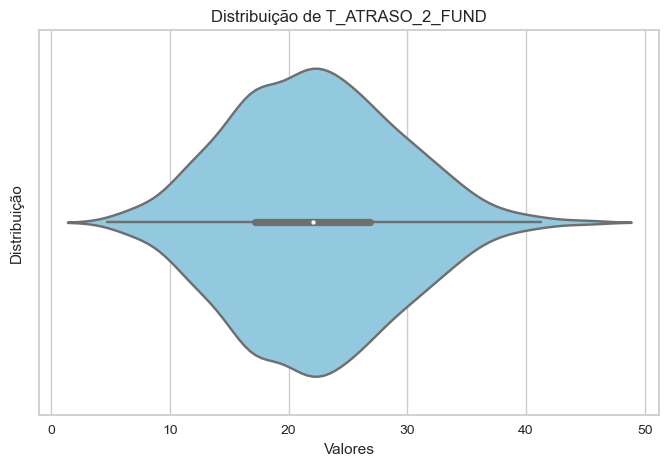

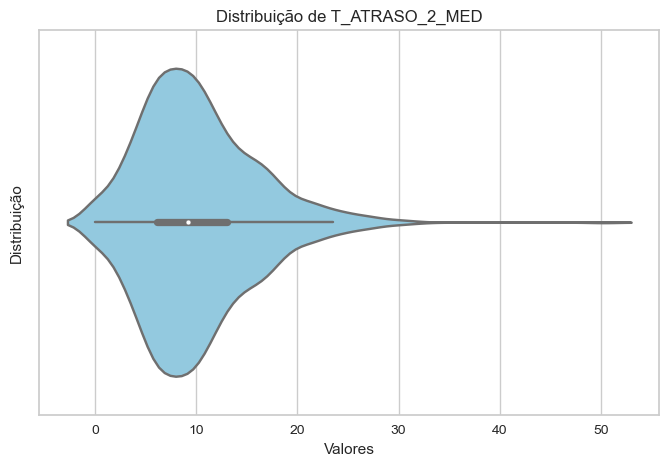

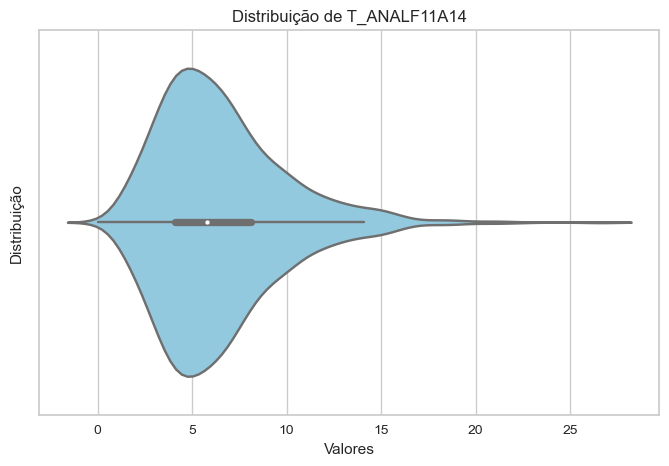

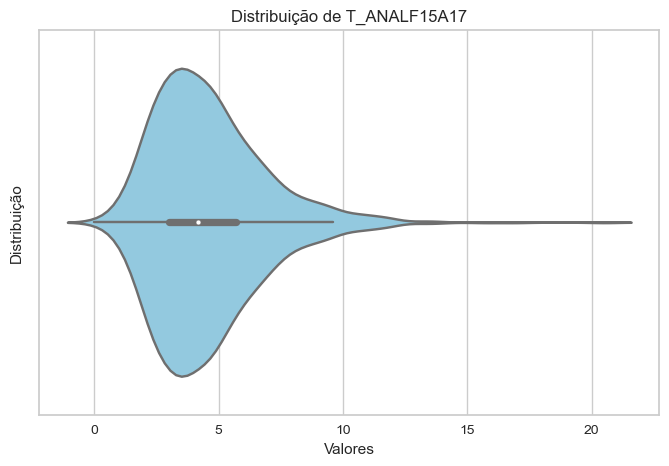

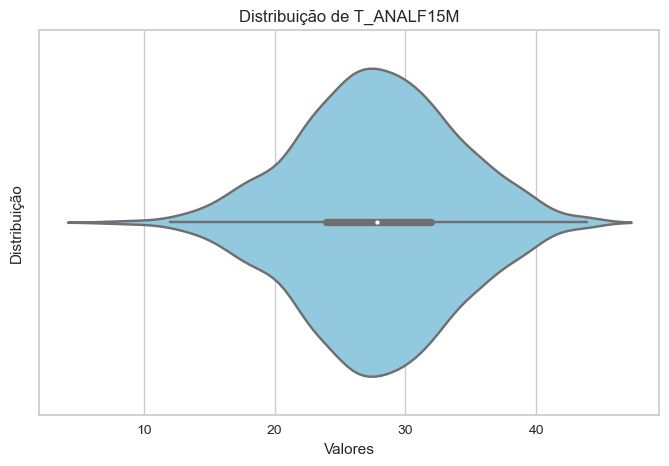

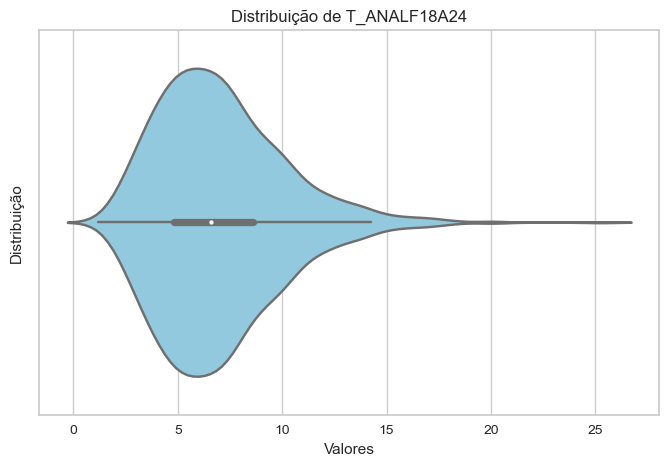

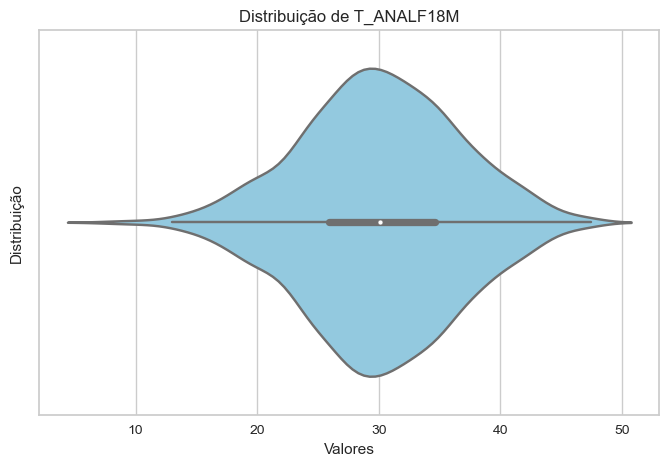

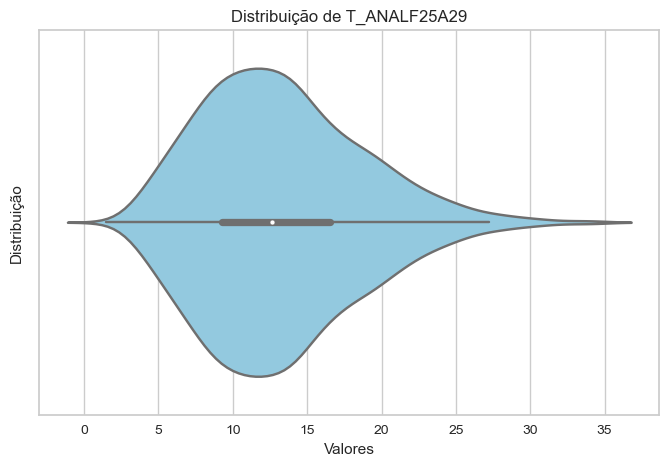

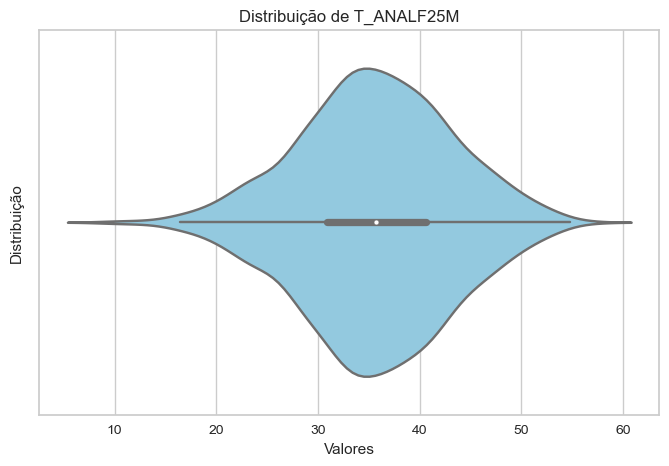

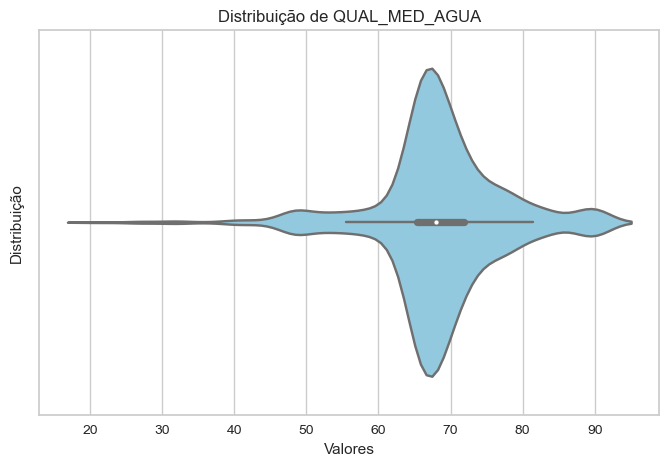

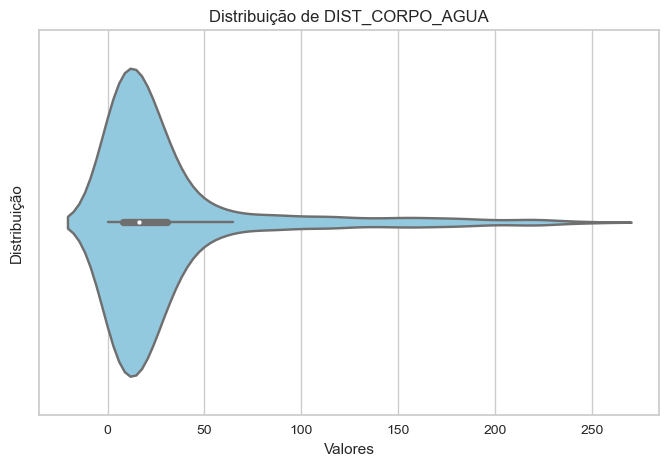

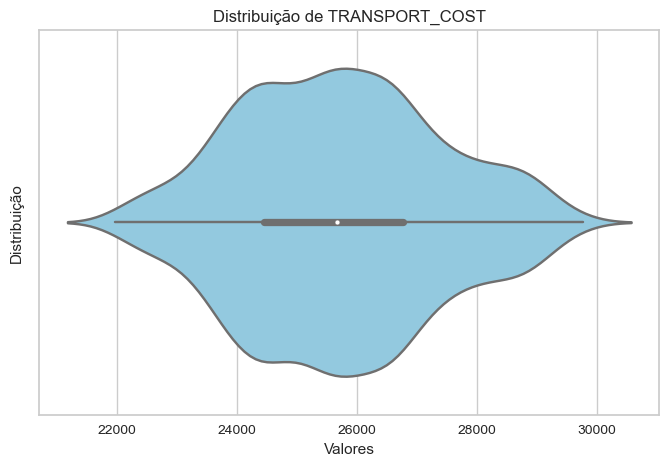

In [4]:
columns = [coluna for coluna in df.columns if (df[coluna].dtype == 'float64')&(coluna not in ['LATITUDE', 'LONGITUDE'])]

for column in columns:
    plt.figure(figsize=(8, 5))  # Ajuste o tamanho da figura conforme necessário
    sns.violinplot(x=df[column], color='skyblue')
        
    # Ajuste o nome dos eixos e o título
    plt.xlabel('Valores')  # Nome do eixo X
    plt.ylabel('Distribuição')  # Nome do eixo Y
    plt.title(f'Distribuição de {column}')  # Título do gráfico
        
    # Exiba o plot
    plt.show()

# 3) Redução da dimensinalidade e análise de cluster

## 3.1) Pré-processamento

In [23]:
df_pp = df[columns].copy()
scaler = StandardScaler()
df_pp[columns] = scaler.fit_transform(df_pp[columns])
df_pp

,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,DOCSUP_EF_PUB,DOCSUP_EM_PUB,TXNASC7C,TXNBAIXOP,PINTERSAP,PINTERDRSAI,...,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,QUAL_MED_AGUA,DIST_CORPO_AGUA,TRANSPORT_COST
0,-0.003596,0.477716,-0.031177,-0.136700,1.033581,0.765998,-0.532485,1.685893,-0.685158,0.128926,...,-0.142099,-0.006035,-0.907976,-0.235238,-0.926590,-0.272550,-0.933316,-0.672664,0.255271,-1.002527
1,0.414315,-0.313415,-0.317830,-0.351283,-1.763812,-0.205948,-0.964248,-0.197712,0.384794,1.067828,...,0.155639,0.336251,0.496749,0.618989,0.515141,1.356863,0.649878,-0.352958,-0.144744,-0.873454
2,1.008218,1.872920,-1.042553,-1.312313,-0.792960,-0.859520,-1.068230,0.337805,-0.538813,0.112658,...,0.964643,2.083245,1.713954,1.801000,1.807141,3.170212,1.903959,-0.352958,-0.635652,-0.891617
3,1.571136,0.573380,-1.004661,-0.977009,0.674700,0.006301,-1.181960,-0.570155,-0.808078,-0.710353,...,2.059356,2.136588,2.132525,2.178449,2.115863,3.142342,2.053917,-0.352958,0.634906,-0.812747
4,0.572105,-0.292874,-0.015685,-0.252989,-1.213439,-0.827165,-1.153605,0.414165,-1.187008,-0.779535,...,1.536059,2.012120,2.088993,2.744623,2.169890,2.802340,2.166718,-0.175071,0.874114,-0.586953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.656201,0.173203,-0.782952,-0.408333,1.721881,2.080907,0.620449,-0.459130,-1.543416,-1.037705,...,-0.512016,-0.366103,0.104966,-0.298146,0.076756,-0.302277,0.081892,-0.396479,-0.679552,-1.092833
1257,0.602878,1.150107,-1.337217,-1.283783,1.547797,1.375567,-0.934516,0.650083,-0.866091,-0.777173,...,-0.725545,-0.557249,0.948806,0.268027,1.069296,0.946258,1.204593,-0.396479,-0.331810,-1.054928
1258,1.125397,0.659667,-0.686162,-0.632387,1.500929,2.448461,-1.040046,-0.074479,-0.538950,-0.932730,...,-0.487956,-0.379438,-0.183011,0.125656,-0.185658,0.216088,-0.196793,-0.376727,-0.649722,-1.076584
1259,0.279610,0.900423,-0.554063,-0.502240,0.448391,1.722413,-0.589257,-0.145111,-1.233405,-0.962682,...,-0.448859,0.389594,-0.090925,-0.529913,-0.074518,0.143629,-0.030909,-0.436431,-0.612629,-1.105958


## 3.2) Aplicação do PCA

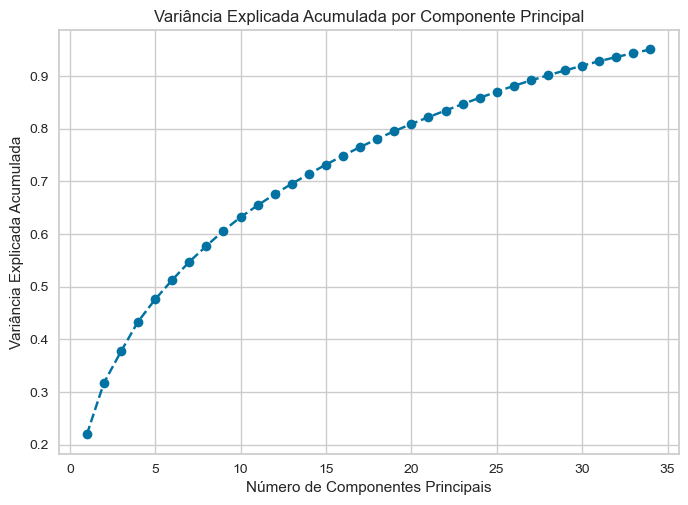

In [24]:
# Aplicar o PCA
pca = PCA(n_components = 0.95)
df_pp = pca.fit_transform(df_pp)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.show()

## 3.3) Análise de cluster

In [25]:
tsne = TSNE(n_components=2, random_state=42)
df_components = tsne.fit_transform(df_pp)
df_components = pd.DataFrame(df_components)
df_components.columns = ['COMPONENT1', 'COMPONENT2']

def plot(df, df_components, clusters):
    df = pd.concat([df, df_components], axis = 1)
    df['CLUSTER'] = clusters

    actual_cities = df[['NOME', 'COMPONENT1', 'COMPONENT2', 'CLUSTER']].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='COMPONENT1', y='COMPONENT2', hue='CLUSTER', palette='Set2')
    sns.scatterplot(data=actual_cities, x='COMPONENT1', y='COMPONENT2', marker = 'X', color='black', s=100, label='Cidades atuais')
    for i, row in actual_cities.iterrows():
        plt.text(row['COMPONENT1'] + 0.1, row['COMPONENT2'], row['NOME'], fontsize=12)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Visualização dos Clusters')
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.show()

### 3.3.1) Hierarchical Clustering

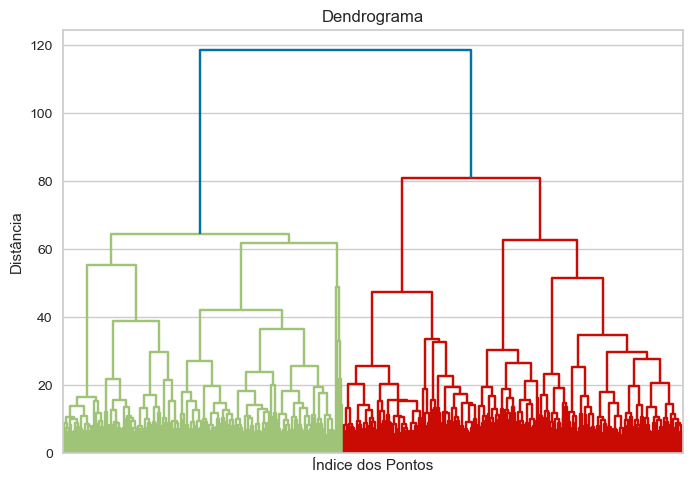

In [26]:
linkage_matrix = linkage(df_pp, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.0963
Davies-Bouldin Score:  2.7232
Calinski-Harabasz Index:  153.2251


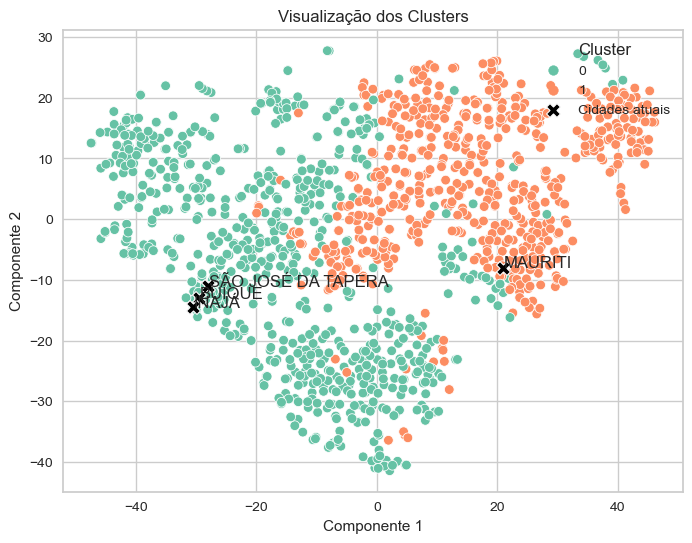

In [27]:
hclustering = AgglomerativeClustering(n_clusters=2)
h_clusters = hclustering.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, h_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, h_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, h_clusters),4))
plot(df, df_components, h_clusters)

### 3.3.2) K-Means

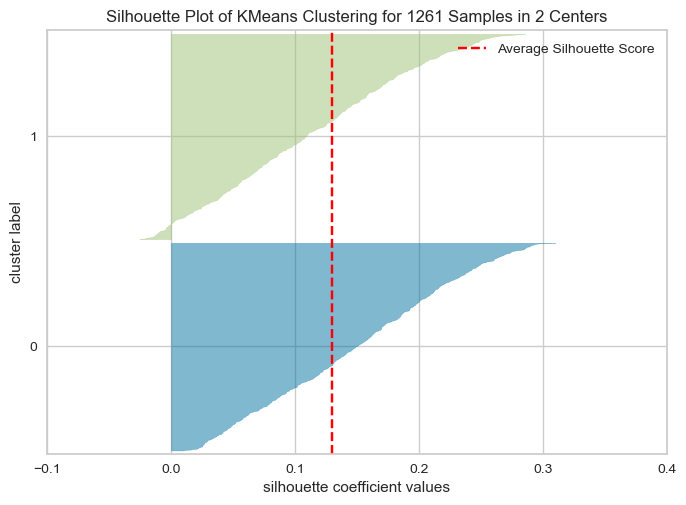

In [28]:
best_score = -1  
best_n_clusters = 0  
for n_clusters in range(2,13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pp)
    score = silhouette_score(df_pp, clusters)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        
silhouette_visualizer(KMeans(best_n_clusters, random_state=42), df_pp, colors='yellowbrick')
plt.show()

Silhouette Score:  0.1301
Davies-Bouldin Score:  2.3258
Calinski-Harabasz Index:  213.2232


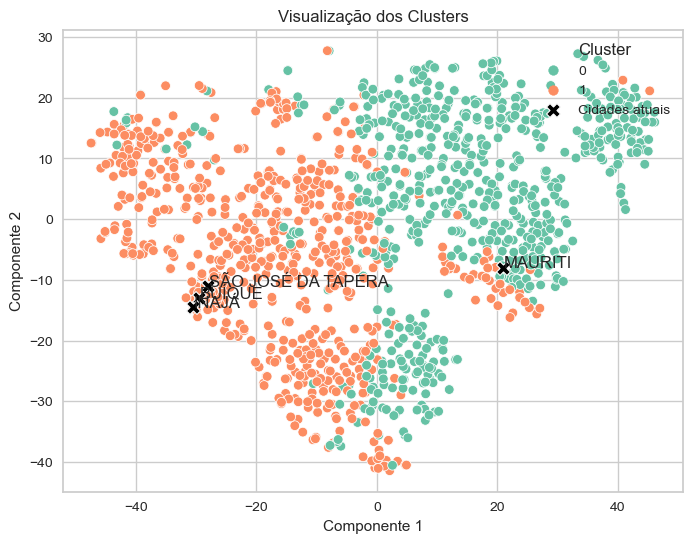

In [29]:
kmeans = KMeans(2, random_state = 42)
k_clusters = kmeans.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, k_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, k_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, k_clusters),4))
plot(df, df_components, k_clusters)

## 3.4) Seleção das melhores features

In [12]:
X = df[columns]
y = k_clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
boruta = BorutaPy(rf_model, n_estimators='auto', verbose=False, random_state=42)
boruta.fit(X_train.values, y_train)
mask_columns_selected = boruta.support_.tolist()
df_pp = X.iloc[:, mask_columns_selected]
columns_selected = df_pp.columns
columns_selected

Index(['DIST_EF_PUB', 'DIST_EM_PUB', 'IDEB_AI', 'IDEB_AF', 'DOCSUP_EF_PUB',
       'DOCSUP_EM_PUB', 'TXNASC7C', 'REN_PIBPC_D', 'PDEFAGUA', 'PDEFESGOTO',
       'PANALF15', 'PIND_POS', 'IDHM', 'T_BANAGUA', 'T_DENS', 'T_LUZ',
       'AGUA_ESGOTO', 'PAREDE', 'PIND', 'PINDCRI', 'T_FBBAS', 'T_FBFUND',
       'T_FBSUPER', 'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND', 'T_ATRASO_1_MED',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_ATRASO_2_MED',
       'T_ANALF11A14', 'T_ANALF15A17', 'T_ANALF15M', 'T_ANALF18A24',
       'T_ANALF18M', 'T_ANALF25A29', 'T_ANALF25M', 'DIST_CORPO_AGUA'],
      dtype='object')

## 3.5) Nova aplicação do PCA

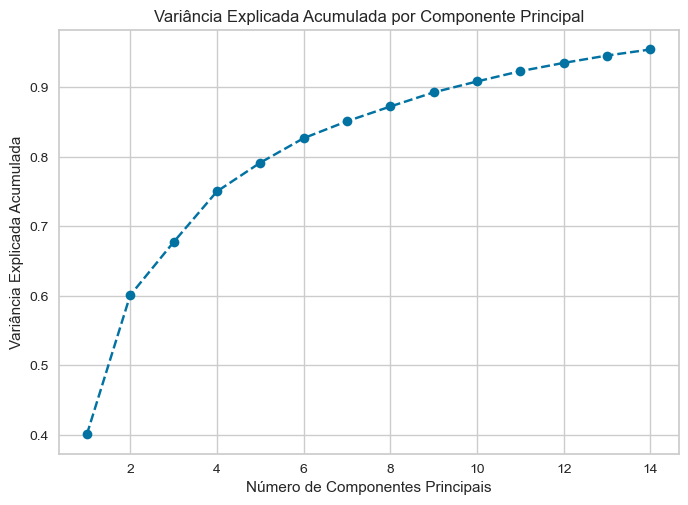

In [13]:
df_pp = pca.fit_transform(df_pp)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.show()

## 3.6) Nova análise de cluster

### 3.6.1) Hierachical Clustering

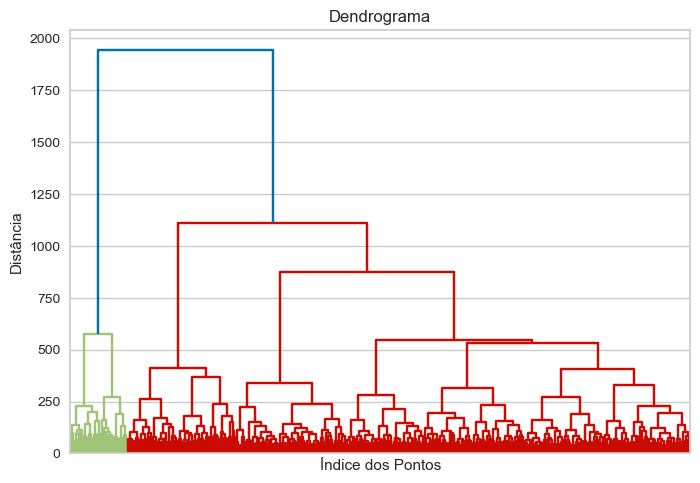

In [14]:
linkage_matrix = linkage(df_pp, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.4897
Davies-Bouldin Score:  0.869
Calinski-Harabasz Index:  586.1199


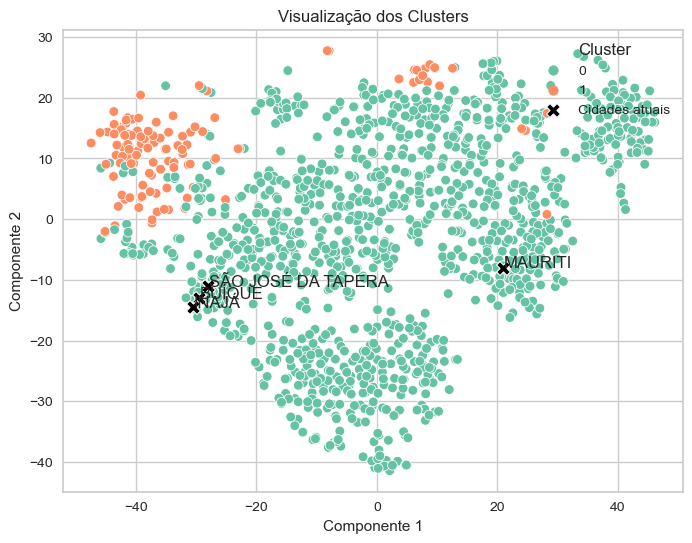

In [15]:
hclustering = AgglomerativeClustering(n_clusters=2)
h_clusters = hclustering.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, h_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, h_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, h_clusters),4))
plot(df, df_components, h_clusters)

### 3.6.2) K-Means

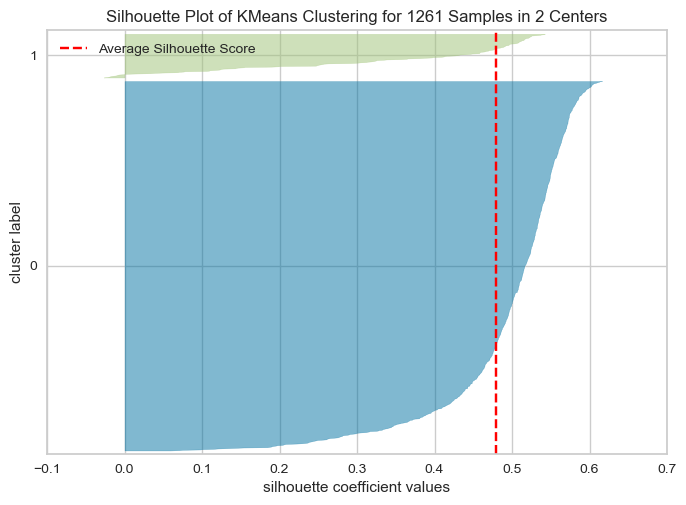

In [16]:
best_score = -1  
best_n_clusters = 0  
for n_clusters in range(2,13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pp)
    score = silhouette_score(df_pp, clusters)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        
silhouette_visualizer(KMeans(best_n_clusters, random_state=42), df_pp, colors='yellowbrick')
plt.show()

Silhouette Score:  0.1742
Davies-Bouldin Score:  1.6736
Calinski-Harabasz Index:  440.2081


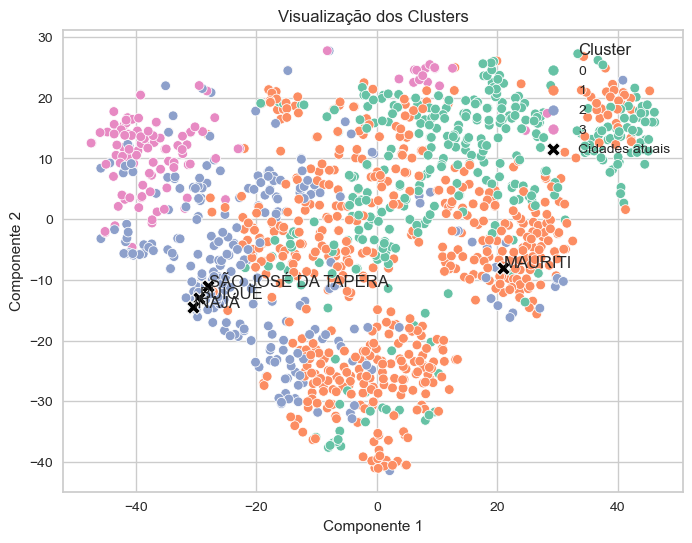

In [17]:
kmeans = KMeans(4, random_state = 42)
k_clusters = kmeans.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, k_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, k_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, k_clusters),4))
plot(df, df_components, k_clusters)

## 3.4) Seleção dos municípios com maior potencial

### 3.4.1) Interpretação dos clusters

In [18]:
df['CLUSTER'] = k_clusters
df[['CLUSTER','IDHM','POP_TOT', 'POP_TOT_30KM', 'AREA_IRRIGADA_POT_E','REN_PIBPC_D']].groupby('CLUSTER').mean()

,IDHM,POP_TOT,POP_TOT_30KM,AREA_IRRIGADA_POT_E,REN_PIBPC_D
CLUSTER,,,,,
0,0.621776,33492.727059,163283.710588,116.998978,7.390660
1,0.592710,19014.158363,134820.091815,101.410751,5.896212
2,0.552147,13774.762550,123464.631873,15.340627,5.090348
3,0.582370,18872.018519,73872.088889,28.260028,5.610391


### 3.4.1) Interpretação dos municípios atuais

In [19]:
actual_cities = df[
    ['NOME', 'UF', 'IDHM','REN_PIBPC_D','T_DES18M','PANALF15','','POP_TOT', 'POP_TOT_30KM','AREA_IRRIGADA_POT_E', 'TRANSPORT_COST','REN_PIBPC_D', 'CLUSTER']
].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

actual_cities

,NOME,UF,IDHM,POP_TOT,POP_TOT_30KM,AREA_IRRIGADA_POT_E,TRANSPORT_COST,REN_PIBPC_D,CLUSTER
34,SÃO JOSÉ DA TAPERA,AL,0.527,32258.8,225558.2,0.000000,24412.742090,5.285771,2
418,MAURITI,CE,0.605,46103.4,207315.4,42.459601,26126.391541,5.218850,1
796,BUÍQUE,PE,0.527,56502.4,234399.4,0.000000,24856.786124,4.553798,2
827,INAJÁ,PE,0.523,21917.0,89734.8,0.000000,24941.784481,4.552523,2


### 3.4.1) Seleção dos municipios de maior potencial

In [20]:
potential_muns = df.copy()

potential_muns = potential_muns[
    ['IBGE7','NOME', 'UF','IDHM','REN_PIBPC_D','POP_TOT', 'POP_TOT_30KM']
].loc[
    (potential_muns['CLUSTER'] == 2)&
    (potential_muns['TRANSPORT_COST'] <= 26126)&
    (potential_muns['POP_TOT'] >= 21917)&
    (potential_muns['POP_TOT_30KM'] >= 89734)&
    ~(potential_muns['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ']))
].sort_values(by='IDHM').reset_index().drop(columns='index')

potential_muns

,IBGE7,NOME,UF,IDHM,POP_TOT,POP_TOT_30KM,AREA_IRRIGADA_POT_E,TRANSPORT_COST,REN_PIBPC_D
0,2705002,MATA GRANDE,AL,0.504,25555.2,129923.6,0.000000,24784.146031,4.465476
1,2921500,MONTE SANTO,BA,0.506,53678.4,107356.8,156.631138,24661.745267,4.339055
2,2607505,ITAÍBA,PE,0.510,26440.2,129160.2,0.000000,24766.124221,5.013908
3,2615805,TUPANATINGA,PE,0.519,26445.0,135832.6,0.000000,24850.504059,4.498442
4,2603207,CAETÉS,PE,0.522,28139.2,275058.0,0.000000,24577.226408,4.814035
5,2702355,CRAÍBAS,AL,0.525,24250.4,452771.8,0.000000,24157.623963,5.080660
6,2600500,ÁGUAS BELAS,PE,0.526,42556.6,120915.8,0.000000,24567.583714,5.073902
7,2709202,TRAIPU,AL,0.532,27788.4,125736.2,0.000000,24050.952763,4.481471
8,2902104,ARACI,BA,0.534,55924.0,150818.4,75.972864,24039.136087,5.081236
9,2702900,GIRAU DO PONCIANO,AL,0.536,40493.4,369830.2,0.000000,24031.204758,4.759701


In [21]:
final_df = df[df['IBGE7'].isin(potential_muns['IBGE7'])].sort_values(by='IDHM').reset_index().drop(columns='index')
final_df.to_csv('../Dados/Tabela_final/municipios_potenciais.csv')

In [22]:
final_df.columns

Index(['IBGE7', 'UF', 'NOME', 'LATITUDE', 'LONGITUDE', 'DIST_EF_PUB',
       'DIST_EM_PUB', 'IDEB_AI', 'IDEB_AF', 'DOCSUP_EF_PUB', 'DOCSUP_EM_PUB',
       'TXNASC7C', 'TXNBAIXOP', 'PINTERSAP', 'PINTERDRSAI', 'REN_PIBPC_D',
       'PDEFAGUA', 'PDEFESGOTO', 'PANALF15', 'PIND_POS', 'SNIS_PAGUA',
       'POP_TOT', 'POP_TOT_30KM', 'PREC_MED', 'TEMP_MED', 'AREA_IRRIGADA_TOT',
       'AREA_IRRIGADA_POT', 'AREA_IRRIGADA_POT_E', 'IDHM', 'T_BANAGUA',
       'T_DENS', 'T_LIXO', 'T_LUZ', 'AGUA_ESGOTO', 'PAREDE', 'PIND', 'PINDCRI',
       'T_DES18M', 'T_FBBAS', 'T_FBFUND', 'T_FBMED', 'T_FBPRE', 'T_FBSUPER',
       'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND', 'T_ATRASO_1_MED',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_ATRASO_2_MED',
       'T_ANALF11A14', 'T_ANALF15A17', 'T_ANALF15M', 'T_ANALF18A24',
       'T_ANALF18M', 'T_ANALF25A29', 'T_ANALF25M', 'QUAL_MED_AGUA',
       'DIST_CORPO_AGUA', 'TRANSPORT_COST', 'CLUSTER'],
      dtype='object')